In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt


In [2]:
data_train_path="Fruits_Vegetables/train"
data_val_path='Fruits_Vegetables/validation'
data_test_path='Fruits_Vegetables/test'


In [3]:
img_width=180
img_height=180


In [4]:
data_train=tf.keras.utils.image_dataset_from_directory(
data_train_path,
validation_split=False,
batch_size=32,
image_size=(img_height,img_width),
shuffle=True,
)

Found 3116 files belonging to 36 classes.


In [5]:
data_cat=data_train.class_names


## showing images

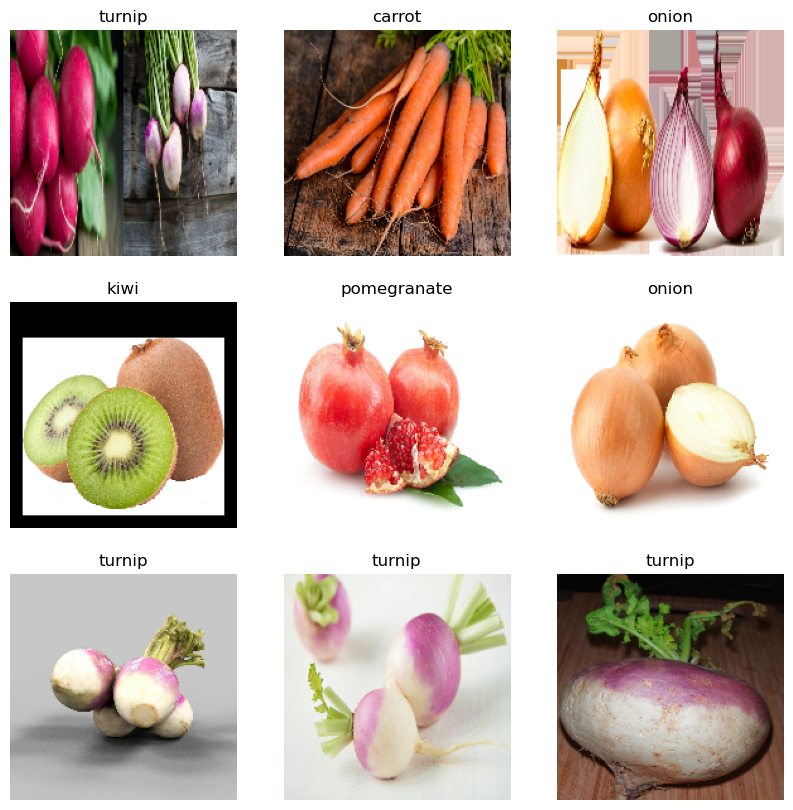

In [6]:
plt.figure(figsize=(10,10))
for image,labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

## modal 

In [7]:
from tensorflow.keras import Sequential
model=Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(units=len(data_cat))
    
]
)

In [8]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
data_val=tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle=False,
    batch_size=32,
    validation_split=False,
    image_size=(img_height,img_width),
)

Found 351 files belonging to 36 classes.


In [13]:
epochs_size=25


In [38]:
history=model.fit(data_train,validation_data=data_val,epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 27s 259ms/step - accuracy: 0.0667 - loss: 3.8271 - val_accuracy: 0.3020 - val_loss: 2.3357
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 25s 254ms/step - accuracy: 0.2707 - loss: 2.5059 - val_accuracy: 0.5356 - val_loss: 1.5405
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 27s 271ms/step - accuracy: 0.4091 - loss: 2.0065 - val_accuracy: 0.6866 - val_loss: 1.1821
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 27s 272ms/step - accuracy: 0.5755 - loss: 1.5154 - val_accuracy: 0.8262 - val_loss: 0.7016
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 27s 270ms/step - accuracy: 0.7174 - loss: 0.9710 - val_accuracy: 0.8746 - val_loss: 0.5349
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 27s 276ms/step - accuracy: 0.8149 - loss: 0.6492 - val_accuracy: 0.8889 - val_loss: 0.5018
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 27s 277ms/step - accuracy: 0.8818 - loss: 0.3948 - val_accuracy: 0.8917 - val_loss: 0.5011
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 28s 279ms/step - accuracy: 0.9191 - loss: 0.3020 - val_accu

In [55]:
model.predict(data_train)

98/98 ━━━━━━━━━━━━━━━━━━━━ 28s 279ms/step


array([[ -4.448999  ,  -6.4261947 ,  -3.6981456 , ...,   2.2647765 ,
        -17.949617  ,  -7.101692  ],
       [  2.830715  ,   2.2533755 ,  -4.8407607 , ...,  -1.9418905 ,
         -4.514108  ,  -0.92169577],
       [ -3.7483237 ,   5.0742135 , -12.359068  , ...,   8.587845  ,
         -7.5790586 , -12.105606  ],
       ...,
       [  0.39830145,   1.9603556 ,  17.385542  , ..., -16.267775  ,
         25.317139  , -19.303024  ],
       [ -1.1755038 ,  -6.8946943 ,   7.94341   , ...,   6.2971983 ,
          9.28785   ,   7.903462  ],
       [  2.5100436 ,   4.148486  ,  -4.8846707 , ...,  -1.390475  ,
         -2.9129944 ,  -3.0108867 ]], dtype=float32)

NameError: name 'history' is not defined

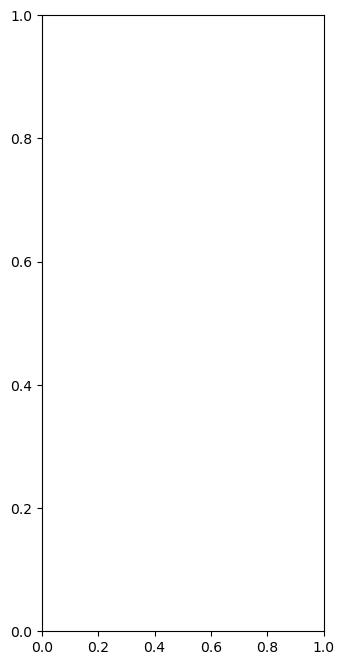

In [14]:
epochs_range=range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label='Training Accuracy')
plt.plot(epochs_range,history.history['val_accuracy'],label='Validation Accuracy')
plt.title("Accuracy")
plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label='Training Losses')
plt.plot(epochs_range,history.history['val_accuracy'], label='Validation Losses')
plt.title("Losses")

In [56]:
image='banana.jpg'
image_load=tf.keras.utils.load_img(image,target_size=(img_height,img_width))
img_arr=tf.keras.utils.array_to_img(image_load)
img_bat=tf.expand_dims(img_arr,0)
predict=model.predict(img_bat)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


In [57]:
score=tf.nn.softmax(predict)

In [58]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))


Veg/Fruit in image is banana with accuracy of 99.47


In [59]:
model.save('Image_classification.keras')

In [62]:
tf.nn.softmax??

Signature: tf.nn.softmax(logits, axis=None, name=None)
Source:   
@tf_export("nn.softmax", "math.softmax", v1=[])
@dispatch.add_dispatch_support
def softmax_v2(logits, axis=None, name=None):
  """Computes softmax activations.

  Used for multi-class predictions. The sum of all outputs generated by softmax
  is 1.

  This function performs the equivalent of

  ```python
  softmax = tf.exp(logits) / tf.reduce_sum(tf.exp(logits), axis, keepdims=True)
  ```
  Example usage:

  >>> softmax = tf.nn.softmax([-1, 0., 1.])
  >>> softmax
  <tf.Tensor: shape=(3,), dtype=float32,
  numpy=array([0.09003057, 0.24472848, 0.66524094], dtype=float32)>
  >>> sum(softmax)
  <tf.Tensor: shape=(), dtype=float32, numpy=1.0>

  Args:
    logits: A non-empty `Tensor`. Must be one of the following types: `half`,
      `float32`, `float64`.
    axis: The dimension softmax would be performed on. The default is -1 which
      indicates the last dimension.
    name: A name for the operation (optional).

  Returns: